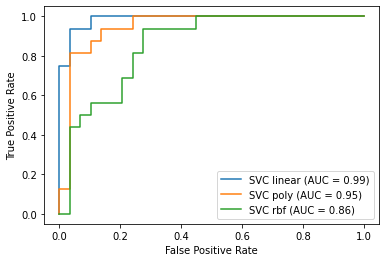

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split

X,y=load_wine(return_X_y=True)
y=y==2

X_train, X_test, y_train, y_test = train_test_split(X, y)
fog,ax=plt.subplots()

svc = SVC(kernel='linear') 
svc.fit(X_train, y_train) 
plot_roc_curve(svc, X_test, y_test, ax=ax, name='SVC linear') 

svc = SVC(kernel='poly', degree=3) 
svc.fit(X_train, y_train) 
plot_roc_curve(svc, X_test, y_test, ax=ax, name='SVC poly') 

svc1 = SVC(kernel='rbf') 
svc1.fit(X_train, y_train) 
plot_roc_curve(svc1, X_test, y_test, ax=ax, name='SVC rbf')

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 

X, y = load_wine(return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(kernel='linear',)
svc.fit(X_train, y_train) 

y_test_pred = svc.predict(X_test) 
# predykcja wartości zmiennej zależnej
# Obliczanie współczynników oceny modelu dla zbioru uczącego
print('\nAccuracy (train):', accuracy_score(y_train, svc.predict(X_train))) 
# Obliczanie współczynników oceny modelu dla zbioru testowego
print('Accuracy (test):', accuracy_score(y_test, y_test_pred), '\n') 

labels = np.unique(y) 
print(classification_report(y_test, y_test_pred, labels=labels)) 

print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_test_pred) 
# obliczenie macierzy pomyłek
print(pd.DataFrame(cm, index=labels, columns=labels)) 

print('\nConfusion matrix - plot') 
pcm = plot_confusion_matrix(svc, X_test, y_test, labels=labels) 

plt.show()

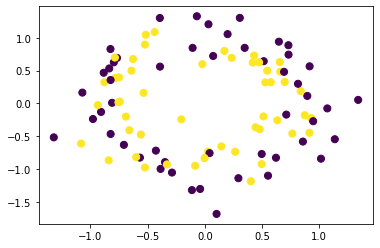

Accuracy (train): 0.6933333333333334

Accuracy (test): 0.6
Precision (test): 0.6363636363636364
Recall (test): 0.5384615384615384


In [ ]:
from sklearn import svm
from sklearn.datasets import make_blobs, make_moons, make_circles

X, y = make_circles(n_samples=100, noise=0.2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50, c=y) 
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
svc = SVC(kernel='rbf', degree=10) # rbf, poly
svc.fit(X_train, y_train) 

print('Accuracy (train):', accuracy_score(y_train, svc.predict(X_train))) 
print('\nAccuracy (test):', accuracy_score(y_test, svc.predict(X_test))) 

print('Precision (test):', precision_score(y_test, svc.predict(X_test))) 
print('Recall (test):', recall_score(y_test, svc.predict(X_test)))

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.0

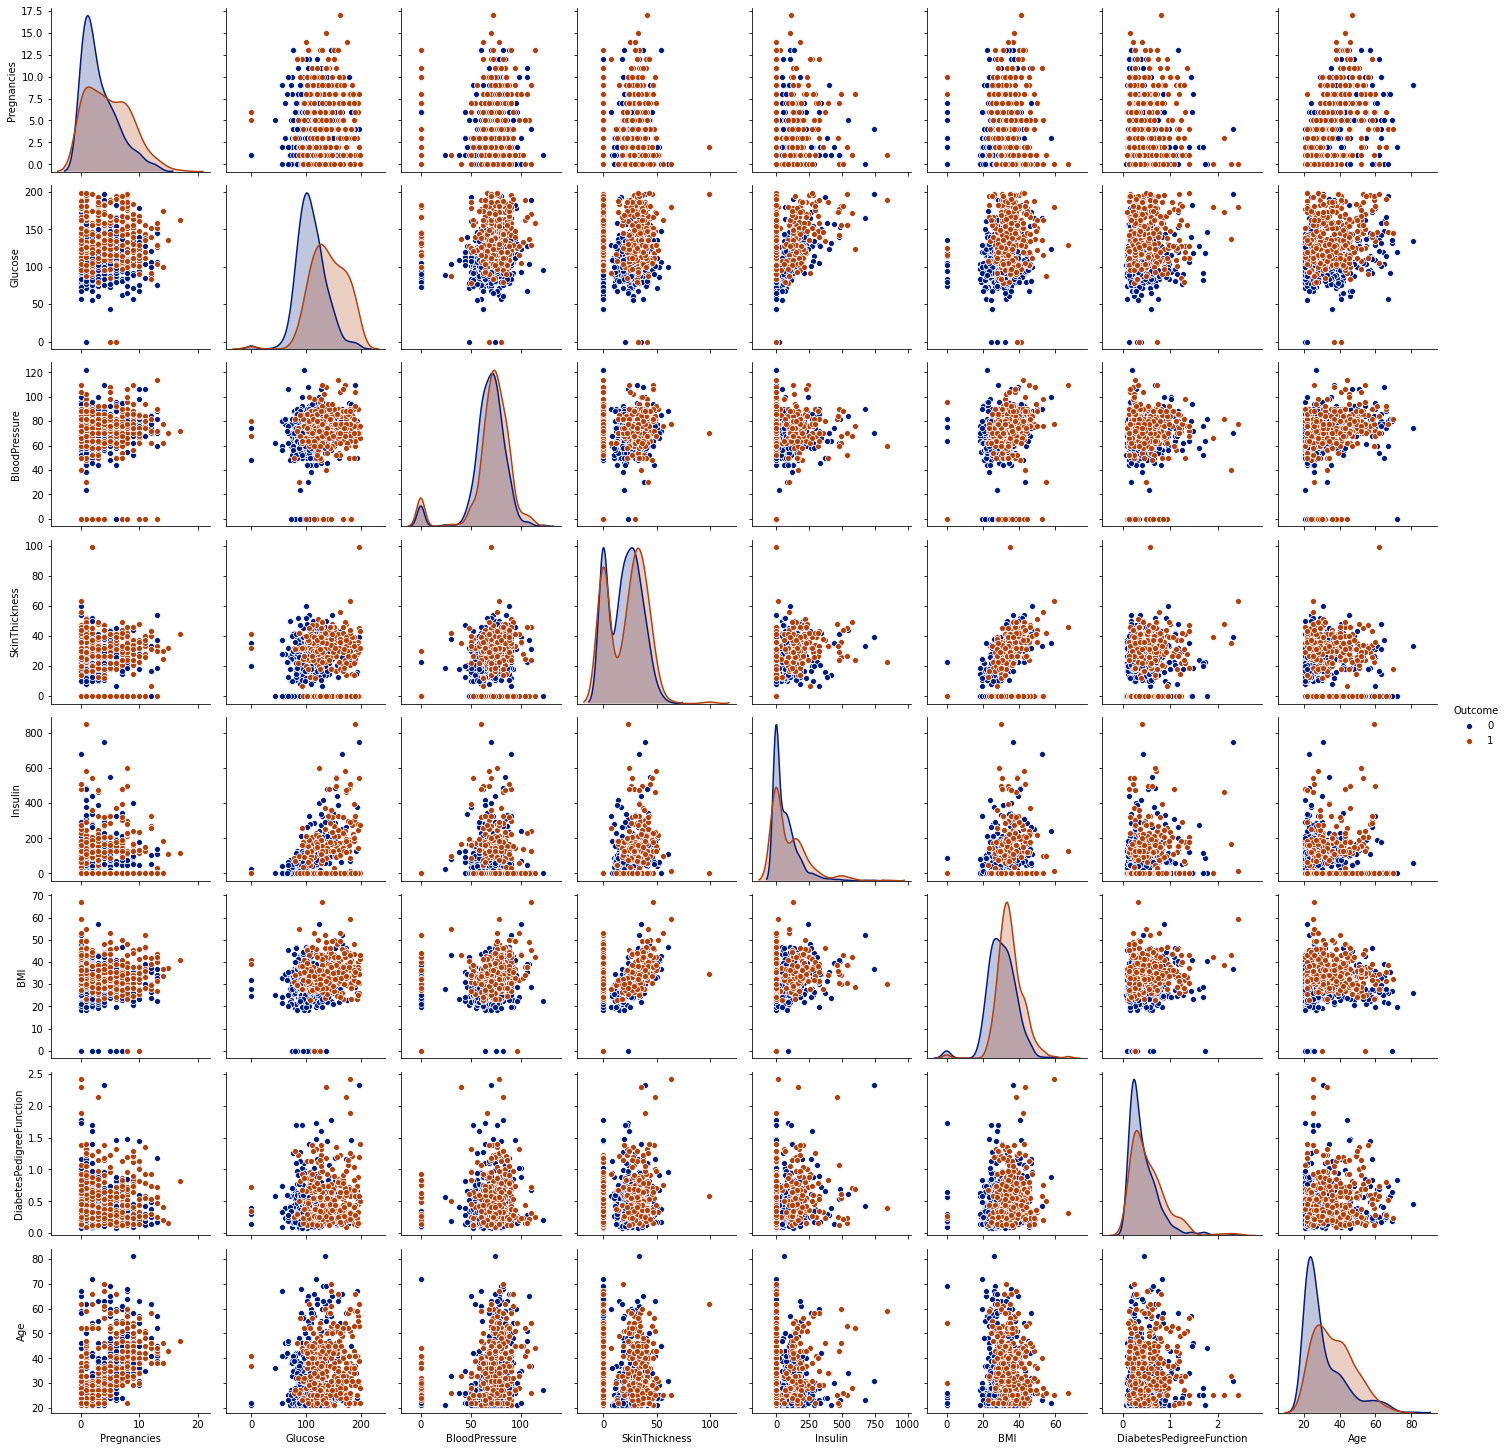

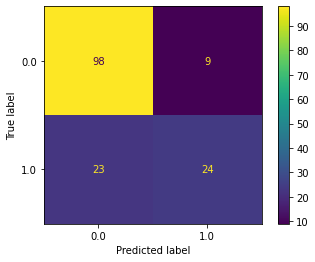


Accuracy on training set: 0.80
Accuracy on test set: 0.78


In [ ]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_profiling import describe 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
import seaborn as sns

plt.close('all') 
df = pd.read_csv('diabetes.csv') 
print(df.head()) 
print(df.describe()) #statystyka opisowa zmiennych
X = df.values[:, 0:8] 
y = df.values[:, 8] 
sns.pairplot(df, hue='Outcome', palette='dark')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
svc = SVC(kernel='rbf') 
print('Cross-validation') 
# walidacja krzyżowa z podziałem zbioru na 5 części
scores = cross_val_score(svc, X_train, y_train, cv=5) 
# dokładność dla każdego podzbioru, średnia dokładność i std
print('Accuracy: ',scores) 
print('Accuracy (mean): ', scores.mean()) 
print('Accuracy (std): ', scores.std())

svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)  
print('\nAccuracy (train):', accuracy_score(y_train, svc.predict(X_train))) 
print('Accuracy (test):', accuracy_score(y_test, y_test_pred), '\n') 
labels = np.unique(y)  
print(classification_report(y_test, y_test_pred, labels=labels))  

print('\nConfusion matrix') 
cm = confusion_matrix(y_test, y_test_pred)  
#print(pd.DataFrame(cm, index=labels, columns=labels))
print(pd.DataFrame(cm, index=['is_healty', 'is_diabetes'], columns=['precited_healthy', 'predicted_diabetes']))

print('\nConfusion matrix - plot') 
pcm = plot_confusion_matrix(svc, X_test, y_test, labels=labels) 
plt.show() 

from sklearn.preprocessing import MinMaxScaler, StandardScaler 
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test) 
svc = SVC(kernel='rbf') 
svc.fit(X_train_scaled, y_train)
print("\nAccuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train))) 
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test))) 